# Datasets

This notebook compares the initial datasets (Secbench, Pontas et al, Big Vul and CVE Details) with the final dataset.

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
from venn import venn

### Research Dataset: SECBENCH

In [10]:
df = pd.read_csv('../github-patches/secbench_secse17.csv')
df.head()

,owner,project,sha,sha-p,year,language,cve_id,cwe_id,score,severity
0,pfsense,pfsense,002bc4ab3268e6e5cb3a01ce73a4c1624d09050a,d6a0379d291f5e98500776618559343f40254e40,2010,php,NaN,CWE-77,NaN,NaN
1,nextcloud,server,0074062b5329c3d43679909fddce2d70608a4475,5c6a7172cafc395d38c58d1b5afd6b36efb33ad5,2012,php,NaN,CWE-79,NaN,NaN
2,nextcloud,server,0241ddc759f7e2d2695c4626df5d2ac27b8b1d90,c2e2c59ca7aa873bd07de04ea701a8b351383aec,2014,php,NaN,CWE-384,NaN,NaN
3,mantisbt,mantisbt,00b4c17088fa56594d85fe46b6c6057bb3421102,b72fdaeb7cb8786401faab520d43092c8bdb44aa,2014,php,CVE-2014-1608,CWE-89,7.5,HIGH
4,splitbrain,dokuwiki,02b0b681935185a1c4d2d64e76fe499f3d438d12,10ffc9dd6a89562ef502baa21f968cf269fe21b0,2006,php,NaN,CWE-79,NaN,NaN


In [11]:
print('number of vulnerabilities:', len(df), '(= number of commits)')
projects = set(['{}/{}'.format(row['owner'], row['project']) for _, row in df[['owner', 'project']].iterrows()])
print('number of projects:', len(projects))
print('number of CVEs:', len(df['cve_id'].unique()))
print('number of vulnerability classes (CWEs):', len(df['cwe_id'].unique()))
print('number of languages:', len(df['language'].unique()))

number of vulnerabilities: 676 (= number of commits)
number of projects: 113
number of CVEs: 189
number of vulnerability classes (CWEs): 51
number of languages: 18


In [12]:
secbench_commits = set([f"https://github.com/{row['owner']}/{row['project']}/{row['sha']}" for _, row in df.iterrows()])

### Research Dataset: Devign

In [13]:
# Devign
df = pd.read_csv('../github-patches/devign_neurips19.csv')
df.head()

,sha_id,project
0,59b126f92225316e0cd77bb952d630553801dc85,ffmpeg
1,96e340760824e537e2d034abf9a3b8be3e2b312c,ffmpeg
2,b93d96a07be40f8e5d267d55fe961285586c0fd7,ffmpeg
3,5b4baf1506277863e9c1fa4bd302a4653e859669,ffmpeg
4,51090133b31bc719ea868db15d3ee38e9dbe90f1,ffmpeg


In [14]:
print('number of vulnerabilities:', len(df))
print('number of projects:', len(df['project'].unique()))

number of vulnerabilities: 10894
number of projects: 2


In [15]:
devign_commits = set([f"https://github.com/{row['project']}/{row['project']}/{row['sha_id']}" for _, row in df.iterrows()])

### Research Dataset: SAP

In [16]:
df = pd.read_csv('../github-patches/pontas_msr19.csv')
df.head()

,cve_id,project,sha,type
0,CVE-2017-4971,https://github.com/spring-projects/spring-webflow,57f2ccb66946943fbf3b3f2165eac1c8eb6b1523,pos
1,CVE-2018-1000134,https://github.com/pingidentity/ldapsdk,8471904a02438c03965d21367890276bc25fa5a6,pos
2,CVE-2016-8749,https://github.com/apache/camel,57d01e2fc8923263df896e9810329ee5b7f9b69,pos
3,CVE-2017-1000393,https://github.com/jenkinsci/jenkins,d7ea3f40efedd50541a57b943d5f7bbed046d091,pos
4,CVE-2018-8034,https://github.com/apache/tomcat,2835bb4e030c1c741ed0847bb3b9c3822e4fbc8a,pos


In [17]:
print('number of commits:', len(df))
print('number of projects:', len(df['project'].unique()))
print('number of CVEs:', len(df['cve_id'].unique()))

number of commits: 1282
number of projects: 205
number of CVEs: 624


In [18]:
sap_commits = set([f"https://github.com/{row['project']}/{row['sha']}" for _, row in df.iterrows()])

### Research Dataset: Big-Vul

In [19]:
df = pd.read_csv('../github-patches/big_vul_msr20.csv')
df.head()

,Unnamed: 0,authentication_required,availability_impact,cve_id,cve_page,cwe_id,access_complexity,confidentiality_impact,integrity_impact,publish_date,...,update_date,vulnerability_classification,ref_link,commit_id,commit_message,files_changed,lang,project,version_after_fix,version_before_fix
0,0,Not required,Partial,CVE-2009-1194,https://www.cvedetails.com/cve/CVE-2009-1194/,CWE-189,Medium,Partial,Partial,2009-05-11,...,2018-10-10,DoS Exec Code Overflow,https://github.com/bratsche/pango/commit/4de30...,4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e,[glyphstring] Handle overflow with very long g...,"{""sha"": ""8fb70313eb8835dcce812a86209e2a7d88457...",C,pango,4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e,1c9433bfe43890b102c8cead8ab3ee34b44c5c37
1,1,Not required,Partial,CVE-2010-2809,https://www.cvedetails.com/cve/CVE-2010-2809/,CWE-94,Medium,Partial,Partial,2010-08-19,...,2017-08-16,Exec Code,https://github.com/Dieterbe/uzbl/commit/9cc39c...,9cc39cb5c9396be013b5dc2ba7e4b3eaa647e975,Don't shell-interpret \@SELECTED_URI (fixes FS...,"{""sha"": ""da2c583dc09acf7eb567df6c9c629e61f3c80...",C,uzbl,9cc39cb5c9396be013b5dc2ba7e4b3eaa647e975,afc0f873e873839da75a54e8ca8095d335527786
2,2,Not required,Partial,CVE-2010-2060,https://www.cvedetails.com/cve/CVE-2010-2060/,NaN,Low,Partial,Partial,2010-06-07,...,2017-08-16,Exec Code,https://github.com/kr/beanstalkd/commit/2e8e8c...,2e8e8c6387ecdf5923dfc4d7718d18eba1b0873d,Discard job body bytes if the job is too big.\...,"{""sha"": ""bcfb7d4b22c28d3f909d13dad54b4caa1284f...",C,beanstalkd,2e8e8c6387ecdf5923dfc4d7718d18eba1b0873d,62328a506b8ed24e52c264f073ecbf4e9254f861
3,3,Not required,Partial,CVE-2010-1155,https://www.cvedetails.com/cve/CVE-2010-1155/,CWE-20,Medium,Partial,Partial,2010-04-16,...,2017-08-16,NaN,https://github.com/ensc/irssi-proxy/commit/85b...,85bbc05b21678e80423815d2ef1dfe26208491ab,Check if an SSL certificate matches the hostna...,"{""sha"": ""5a9c9bc71553d37a17b89654bec0b6e98b567...",C,irssi-proxy,85bbc05b21678e80423815d2ef1dfe26208491ab,d5688da48306918cdfd79ee9b27abe377204befb
4,4,Not required,Partial,CVE-2010-1152,https://www.cvedetails.com/cve/CVE-2010-1152/,CWE-20,Low,None,None,2010-04-12,...,2011-03-01,DoS,https://github.com/memcached/memcached/commit/...,d9cd01ede97f4145af9781d448c62a3318952719,Use strncmp when checking for large ascii mult...,"{""sha"": ""3e2e9c59e274910dd88af6fbb73006279b5a6...",C,memcached,d9cd01ede97f4145af9781d448c62a3318952719,ea0fec7989ba00cf68326d017fd801a1716f8855


In [20]:
print('number of CVEs:', len(df['cve_id'].unique()))
print('number of vulnerability classes (CWEs):', len(df['cwe_id'].unique()))

number of CVEs: 3441
number of vulnerability classes (CWEs): 89


In [21]:
bigvul_commits = set(list(df['ref_link']))

### Source: NVD

In [22]:
df = pd.read_csv('../github-patches/nvd.csv')
df.head()

,cve_id,year,cwes,description,severity,exploitability,impact,published_date,last_modified_date,refs,code_refs,commits
0,CVE-2021-20230,2021,{'CWE-295'},"A flaw was found in stunnel before 5.57, where...",MEDIUM,10.0,2.9,2021-02-23T17:15Z,2021-05-26T10:15Z,{'https://github.com/mtrojnar/stunnel/commit/e...,{'https://github.com/mtrojnar/stunnel/commit/e...,{'https://github.com/mtrojnar/stunnel/commit/e...
1,CVE-2021-20271,2021,{'CWE-345'},A flaw was found in RPM's signature check func...,MEDIUM,4.9,6.4,2021-03-26T17:15Z,2021-12-10T19:50Z,"{'https://security.gentoo.org/glsa/202107-43',...",{'https://github.com/rpm-software-management/r...,{'https://github.com/rpm-software-management/r...
2,CVE-2021-21234,2021,{'CWE-22'},spring-boot-actuator-logview in a library that...,MEDIUM,8.0,2.9,2021-01-05T18:15Z,2021-01-11T14:41Z,{'https://github.com/lukashinsch/spring-boot-a...,{'https://github.com/lukashinsch/spring-boot-a...,{'https://github.com/lukashinsch/spring-boot-a...
3,CVE-2021-21235,2021,{'CWE-400'},kamadak-exif is an exif parsing library writte...,MEDIUM,8.6,2.9,2021-01-06T02:15Z,2021-01-08T19:23Z,"{'https://crates.io/crates/kamadak-exif', 'htt...",{'https://github.com/kamadak/exif-rs/commit/f2...,{'https://github.com/kamadak/exif-rs/commit/f2...
4,CVE-2021-21236,2021,{'CWE-400'},CairoSVG is a Python (pypi) package. CairoSVG ...,MEDIUM,8.6,2.9,2021-01-06T17:15Z,2021-01-13T15:43Z,"{'https://pypi.org/project/CairoSVG/', 'https:...",{'https://github.com/Kozea/CairoSVG/commit/cfc...,{'https://github.com/Kozea/CairoSVG/commit/cfc...


In [23]:
print('number of vulnerabilities:', len(df))

number of vulnerabilities: 7316


In [24]:
nvd_commits = set()
for idx, row in df.iterrows():
    commits = eval(row['commits'])
    nvd_commits = set.union(nvd_commits, commits)

### Source: OSV

In [25]:
df = pd.read_csv('../github-patches/osv.csv')
df.head()

,ecosystem,vuln_id,summary,details,aliases,modified_date,published_date,severity,score,cwe_id,refs,introduced,code_refs,commits
0,GHSA,GHSA-p6j9-7xhc-rhwp,Hostname spoofing via backslashes in URL,NaN,NaN,2021-04-05T20:33:00Z,2021-03-01T20:03:53Z,NaN,NaN,NaN,{'https://github.com/medialize/URI.js/security...,NaN,{'https://github.com/medialize/URI.js/commit/a...,{'https://github.com/medialize/URI.js/commit/a...
1,GHSA,GHSA-mq5c-prh3-3f3h,Invalid validation in `QuantizeAndDequantizeV2`,NaN,NaN,2021-05-21T14:28:32Z,2021-05-21T14:28:32Z,NaN,NaN,NaN,{'https://github.com/tensorflow/tensorflow/com...,NaN,{'https://github.com/tensorflow/tensorflow/com...,{'https://github.com/tensorflow/tensorflow/com...
2,GHSA,GHSA-9v62-24cr-58cx,Denial of Service in node-sass,NaN,NaN,2021-09-28T16:08:18Z,2020-09-11T21:12:39Z,NaN,NaN,NaN,{'https://github.com/sass/node-sass/commit/338...,NaN,{'https://github.com/sass/node-sass/commit/338...,{'https://github.com/sass/node-sass/commit/338...
3,GHSA,GHSA-h6wf-hvwc-fm77,Out-of-bounds write,NaN,NaN,2021-03-29T21:00:02Z,2021-03-29T21:00:02Z,NaN,NaN,NaN,{'https://nvd.nist.gov/vuln/detail/CVE-2019-09...,NaN,{'https://github.com/chakra-core/ChakraCore/co...,{'https://github.com/chakra-core/ChakraCore/co...
4,GHSA,GHSA-5c8j-xr24-2665,Potential Command Injection in printer,NaN,NaN,2021-09-01T21:34:21Z,2017-11-28T22:44:52Z,NaN,NaN,NaN,{'https://github.com/advisories/GHSA-5c8j-xr24...,NaN,{'https://github.com/tojocky/node-printer/comm...,{'https://github.com/tojocky/node-printer/comm...


In [26]:
print('number of vulnerabilities:', len(df))

number of vulnerabilities: 4125


In [27]:
osv_commits = set()
for idx, row in df.iterrows():
    commits = eval(row['commits'])
    osv_commits = set.union(osv_commits, commits)

### Source: CVE Details

In [28]:
df = pd.read_csv('../github-patches/cve_details.csv')
df.head()

,cve_id,cve_href,cwe_id,vuln_type,publish_date,update_date,score,acces_level,access,complexity,authentication,confidentiality,integrity,availability,summary,refs,code_refs,commits
0,CVE-2008-5619,https://www.cvedetails.com/cve/CVE-2008-5619/,CWE-94,Exec Code,2008-12-17,2018-10-11,10.0,None,Remote,Low,Not required,Complete,Complete,Complete,html2text.php in Chuggnutt HTML to Text Conver...,"{'https://www.exploit-db.com/exploits/7553', '...",{'https://github.com/PHPMailer/PHPMailer/commi...,{'https://github.com/PHPMailer/PHPMailer/commi...
1,CVE-2008-5189,https://www.cvedetails.com/cve/CVE-2008-5189/,CWE-352,Http R.Spl.,2008-11-21,2019-08-08,5.0,None,Remote,Low,Not required,None,Partial,None,CRLF injection vulnerability in Ruby on Rails ...,{'http://lists.opensuse.org/opensuse-security-...,{'https://github.com/rails/rails/commit/7282ed...,{'https://github.com/rails/rails/commit/7282ed...
2,CVE-2009-4214,https://www.cvedetails.com/cve/CVE-2009-4214/,CWE-79,XSS,2009-12-07,2019-08-08,4.3,None,Remote,Medium,Not required,None,Partial,None,Cross-site scripting (XSS) vulnerability in th...,"{'https://support.apple.com/kb/HT4077', 'http:...",{'https://github.com/rails/rails/commit/bfe032...,{'https://github.com/rails/rails/commit/bfe032...
3,CVE-2009-3627,https://www.cvedetails.com/cve/CVE-2009-3627/,CWE-20,DoS,2009-10-29,2017-08-17,4.3,None,Remote,Medium,Not required,None,None,Partial,The decode_entities function in util.c in HTML...,{'https://exchange.xforce.ibmcloud.com/vulnera...,{'https://github.com/gisle/html-parser/commit/...,{'https://github.com/gisle/html-parser/commit/...
4,CVE-2009-3287,https://www.cvedetails.com/cve/CVE-2009-3287/,CWE-20,NaN,2009-09-22,2009-09-22,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,lib/thin/connection.rb in Thin web server befo...,{'https://github.com/macournoyer/thin/commit/7...,{'https://github.com/macournoyer/thin/commit/7...,{'https://github.com/macournoyer/thin/commit/7...


In [29]:
print('number of vulnerabilities:', len(df))
print('number of CVEs:', len(df['cve_id'].unique()), '(= number of vulnerabilities)')
print('number of vulnerability classes (CWEs):', len(df['cwe_id'].unique()))

number of vulnerabilities: 221
number of CVEs: 221 (= number of vulnerabilities)
number of vulnerability classes (CWEs): 20


In [30]:
cvedet_commits = set()
for idx, row in df.iterrows():
    commits = eval(row['code_refs'])
    cvedet_commits = set.union(cvedet_commits, commits)

### Venn: Datasets

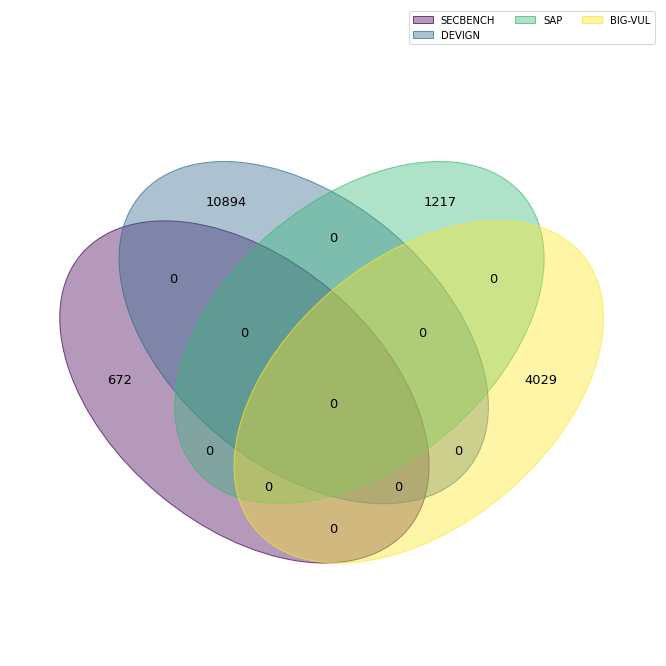

In [31]:
labels = ['SECBENCH', 'DEVIGN', 'SAP', 'BIG-VUL']

sets = {
    labels[0]: secbench_commits,
    labels[1]: devign_commits,
    labels[2]: sap_commits,
    labels[3]: bigvul_commits
}

fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
plt.legend(labels, ncol=3)

### Venn: Source

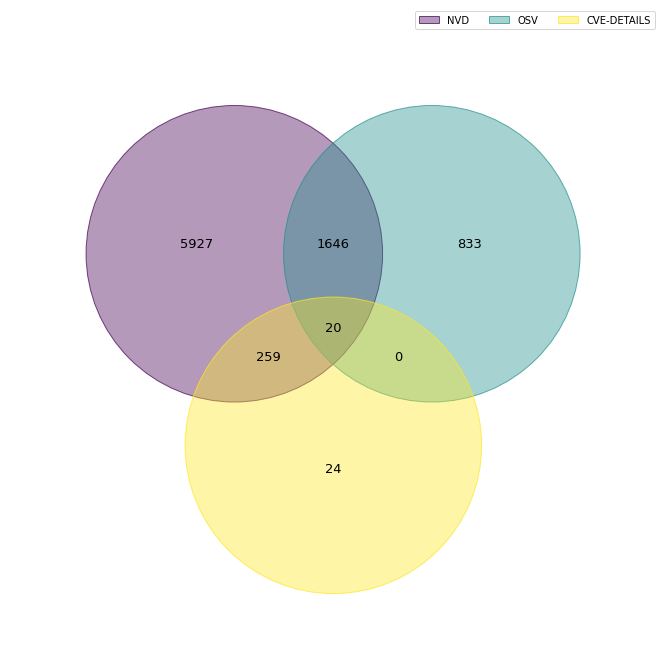

In [32]:
labels = ['NVD', 'OSV', 'CVE-DETAILS']

sets = {
    labels[0]: nvd_commits,
    labels[1]: osv_commits,
    labels[2]: cvedet_commits
}

fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
plt.legend(labels, ncol=3)

### Intersection of the different research datasets and sources

Text(0.5, 0.98, 'Intersection of the different datasets')

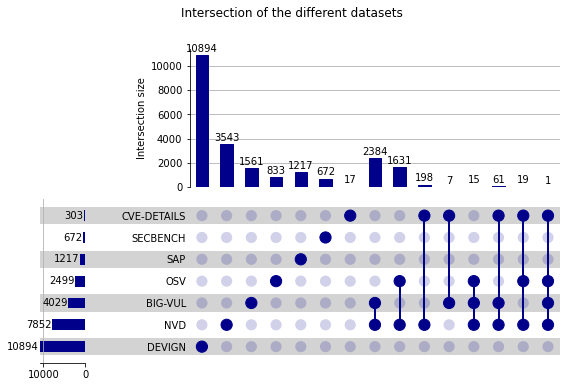

In [33]:
import upsetplot

labels = ['SECBENCH', 'DEVIGN', 'SAP', 'BIG-VUL', 'NVD', 'OSV', 'CVE-DETAILS']

sets = {
    labels[0]: secbench_commits,
    labels[1]: devign_commits,
    labels[2]: sap_commits,
    labels[3]: bigvul_commits,
    labels[4]: nvd_commits,
    labels[5]: osv_commits,
    labels[6]: cvedet_commits,
}

upset_data_sub = upsetplot.from_contents(sets)
upsetplot.plot(upset_data_sub, show_counts=True,facecolor="darkblue", shading_color="lightgray")
plt.suptitle('Intersection of the different datasets')

- `DEVIGN`, `SAP` and `SECBENCH` only have unique cases. There is no overlap with any of the other datasets.
- The rest of the research datasets some overlapping between them.